# Data Analyze of AirBNB
AirBnB adalah platform atau pasar daring yang memungkinkan individu menyewakan akomodasi jangka pendek, seperti rumah, apartemen, vila, kamar, atau tempat tinggal lainnya. AirBnb ingin menaikkan income mereka dengan mencari tahu faktor apa saja yang dapat mempengaruhi income mereka. 


# Rumusan Masalah
Preferensi apakah yang paling mempengerahi total income? (lokasi, populartias host, harga atau ulasan)
Rekomendasi untuk AirBnB


### DATA OVERVIEW

In [164]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from tabulate import tabulate
import warnings
from scipy.stats import spearmanr
warnings.filterwarnings("ignore")

In [166]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [167]:
# menampilkan ringkasan statistik deskriptif dari DataFrames
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


### Menambahkan Colum 'Total Income'
- Total income di estimasi melalui perhitungan `price` x `number_of_reviews` x `minimun_night`

In [168]:
# Menambahkan kolom baru 'total_income yang merupakan hasil perkalian 'price' dan 'number_of_reviews'dan 'minimum_nights'
df['total_income'] = df['price'] * df['number_of_reviews']
# Menyimpan indeks
original_index = df.index

# Kembalikan indeks yang disimpan
df.index = original_index

# Tampilkan hasil
print(df.head())

   Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905      

# Data Cleaning and Preparation

Memeriksa jenis Data Type. Di sini juga kita dapat meilhat jumlah total baris dan column. Dari sini juga dapat kita lihat secara keseluruhan, column mana yang memiliki missing value

In [169]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

Pada Column '`name`, `host_name`, `last_review` dan `reviews_per_month` memiliki jumlah entries yang berbeda dengan total jumlah entries secara kesuluruhan yaitu '15854'. Hal ini menunjukkan bahwa terdapat Missing Value dalam column tersebut. 

# Duplicate Data

In [170]:
#mengecek Duplicate dalam data
df.duplicated().value_counts()

False    15854
Name: count, dtype: int64

# Missing Value

In [171]:
# Menghitung jumlah missing value per kolom
missing_values = df.isnull().sum()

# Menghitung persentase missing value per kolom
missing_percentage = ((missing_values / len(df)) * 100).round(2)

missing_percentage

Unnamed: 0                         0.00
id                                 0.00
name                               0.05
host_id                            0.00
host_name                          0.01
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       36.52
reviews_per_month                 36.52
calculated_host_listings_count     0.00
availability_365                   0.00
number_of_reviews_ltm              0.00
total_income                       0.00
dtype: float64

Berdasarkan presentasi Missing Value di atas, `last_review` dan `reviews per month` memiliki presentase missing value lebih dari 10%, lihat sebaran datanya

<Axes: >

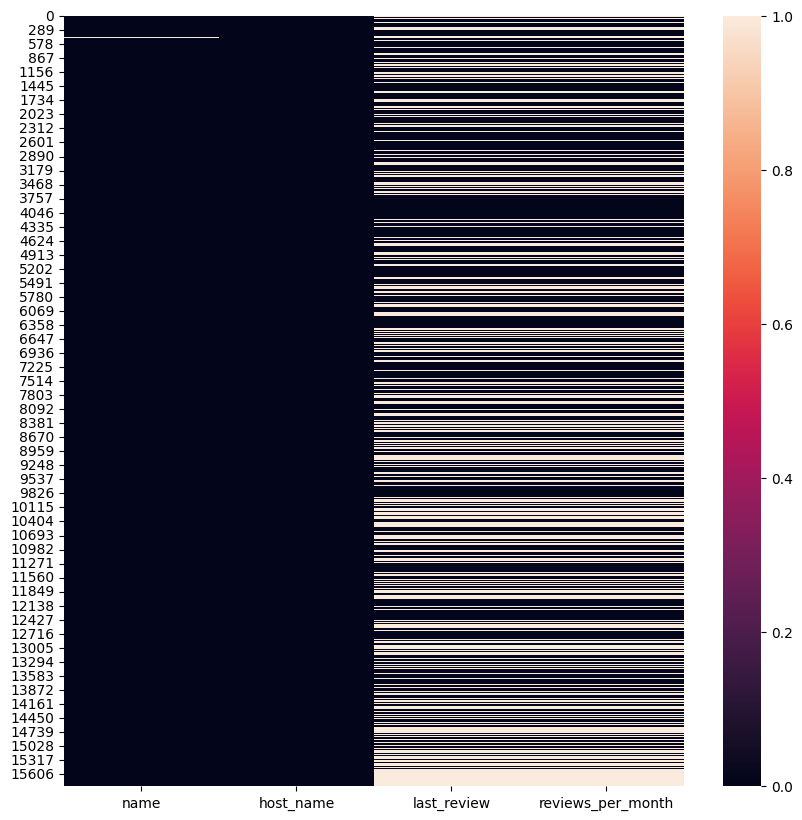

In [172]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sb.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Secara garis besar:  
* *missing value* di kolom `last_review, `reviews_per_month`  memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom  `review_per_month` mencapai 36.52%.
* *missing value* di kolom `last_review` dan `review_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.  Namun pada analisis kali ini tidak dibutuhkan kapan review terakhir dilakukan dan berapa banyak reviews per bulan, maka dari itu untuk column `last_review` dan `revies_per_month`dapat dihapus. 



In [173]:
# jumlah missing value di kolom 'name dan 'host_name', dan 'reviews_per_month'
df[['name', 'host_name']].isna().sum()

name         8
host_name    1
dtype: int64

In [174]:
# Melihat kolom 'name' yang kosong 
df.loc[df['name'].isna(), ['name', 'host_name', 'number_of_reviews']]
#beberapa lsting tidak memiliki nama, tetapi ada yang menyewa dengan adanya review 

,name,host_name,number_of_reviews
439,NaN,Titawan,0
544,NaN,Cherry,0
572,NaN,Parichart,0
669,NaN,Chira,0
1030,NaN,Nantida,0
1282,NaN,Diamond Bangkok,6
1594,NaN,Khaneungnit,0
2075,NaN,Pakaphol,2


In [175]:
# Melihat column host name yang tidak ada nama
df.loc[df['host_name'].isna(), ['name', 'host_name', 'number_of_reviews',]]

,name,host_name,number_of_reviews
3571,Cozy Hideaway,NaN,1


pada column `host_name` dan `name` yang tidak ada nama, memilik 1 reviews hal ini dapat diartikan pernah ada orang yg menyewa listing tersebut walau tidak ada nama. Tida adanya nama pada kolom host dan nama listing di sini dapat diduga karena kesalahan sistem. Jadi kita dapat mengisi kolom kosong tersebut dengan 'no name'

In [176]:
# Mengisi data kosonng pada 'host_name' dengan = no name
df['host_name'].fillna('no name', inplace = True)
df[df['host_name']== 'no name']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_income
3571,3571,19682464,Cozy Hideaway,137488762,no name,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0,1399


In [177]:
#Mengisi missing value pada column "name"  dengan 'no_name'
df['name'].fillna('no name', inplace = True)
df[df['name']== 'no name']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_income
439,439,4549768,no name,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0,0
544,544,4720818,no name,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0,0
572,572,4245018,no name,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0,0
669,669,6148415,no name,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0,0
1030,1030,8055144,no name,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0,0
1282,1282,10000742,no name,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,5580
1594,1594,10710165,no name,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0,0
2075,2075,13142743,no name,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,1700


In [178]:
zero_price_rows = df[df['price'] == 0]
# Menampilkan baris yang memiliki harga nol
zero_price_rows

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_income
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0,0


terdapat listing yang memiliki harga `0`, dan tidak ada reviwws yang dalam hal ini berarti tidak ada yang menyewa properti tersebut.  dalam hal ini diperkirakan adanya kesalahan input/kesalahan sistem maka dari itu data dapat dihapus agar tidak mengganngu proses analisa data

###  Menghapus Data yang tidak dibutuhkan dalam analisas seperti :
- Unnamed: 0
- id dan host id (karena merupakan kode unik)
- last_reviews
- reviews_per_month   
- Data oulier pada price  

In [179]:
# Menghapus Column 
df.drop(columns=['Unnamed: 0','id', 'host_id', 'last_review', 'reviews_per_month'], inplace = True)

In [180]:
#menghapus baris 11103 pada colum price
df.drop(11103, inplace = True)

In [181]:
# Menghitung jumlah missing value per kolom
missing_values = df.isnull().sum()
missing_values

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
total_income                      0
dtype: int64

In [182]:
#Menampilkan jumlah data yang sudah di cleaning 
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15853, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            15853 non-null  object 
 1   host_name                       15853 non-null  object 
 2   neighbourhood                   15853 non-null  object 
 3   latitude                        15853 non-null  float64
 4   longitude                       15853 non-null  float64
 5   room_type                       15853 non-null  object 
 6   price                           15853 non-null  int64  
 7   minimum_nights                  15853 non-null  int64  
 8   number_of_reviews               15853 non-null  int64  
 9   calculated_host_listings_count  15853 non-null  int64  
 10  availability_365                15853 non-null  int64  
 11  number_of_reviews_ltm           15853 non-

Setalah dilakukan proses data cleaning, data berubah dari jumlah column 18 menjadi 13 columns dan 15853 baris yang semulanya 15854

In [183]:
#Menampilkan Data yang sudah siap dianalisis
display(df.head(),df.tail())

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_income
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2,353,0,123825
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,2,358,0,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1,365,0,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,1,323,1,2572
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,3,365,0,0


,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_income
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1,362,0,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,14,365,0,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,14,365,0,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,14,365,0,0
15853,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,14,365,0,0


In [291]:
# Menyimpan data dalam bentuk csv baru
df.to_csv('data_cleaned.csv', index=False)

# Data Analysis

### Berdasarkan Lokasi 
- Lokasi manakah yang paling banyak dikunjungi (berdasarkan total reviews)
- Mengapa lokasi tersebut paling banyak reviews/pengunjung ?
- Lokasi manakah yang paling banyak pemasukan? 
- Lokasi manakah yang memiliki listing paling banyak ?
- Apakah lokasi berkorelasi dengan total income ??



In [292]:
# 10 lokasi dengan jumlah reviews paling banyak
total_reviews = df.groupby('neighbourhood')['number_of_reviews'].sum()
sorted_reviews = total_reviews.sort_values(ascending=False)
top_10_locations = sorted_reviews.head(10)
top_10_locations

neighbourhood
Khlong Toei    41281
Vadhana        37415
Sathon         22242
Ratchathewi    20698
Huai Khwang    18145
Bang Rak       17654
Phaya Thai     13659
Parthum Wan     9103
Chatu Chak      8218
Phra Nakhon     8142
Name: number_of_reviews, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

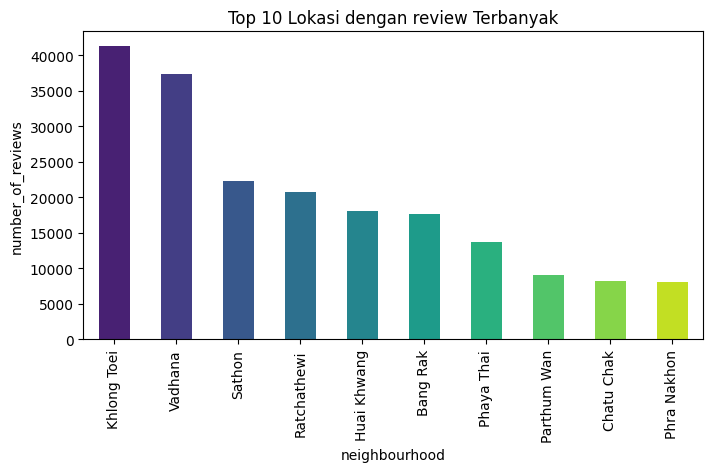

In [185]:
# Bar Chart Top 10 Lokasi dengan reviews paling banyak
colors = sb.color_palette('viridis', len(top_10_locations))
plt.figure(figsize=(8, 4))
top_10_locations.plot(kind='bar', color=colors)
plt.title('Top 10 Lokasi dengan review Terbanyak')
plt.xlabel('neighbourhood')
plt.ylabel('number_of_reviews')
plt.show

Lokasi yang paling banyak diminati berdasarkan hasil grafik di atas adalah Khlong Toei, hal ini dikarenakan Khloeng Toei merupakan kawasan wisata yang berada di Kota Bangkok (source : google )

In [186]:
## top 5 neighbourhood with the biggest total income
total_income_loc = df.groupby('neighbourhood')['total_income'].sum()
sorted_income_loc = total_income_loc.sort_values(ascending=False)
top_5_locations_biggest_income = sorted_income_loc.head(5)
print(top_5_locations_biggest_income)

neighbourhood
Khlong Toei    193431184
Huai Khwang    154609413
Vadhana        105941999
Bang Rak        43748616
Ratchathewi     42375064
Name: total_income, dtype: int64


In [187]:
merged_df = pd.merge(top_5_locations_biggest_income, sorted_reviews, on='neighbourhood', how='inner')
merged_df

,total_income,number_of_reviews
neighbourhood,,
Khlong Toei,193431184,41281
Huai Khwang,154609413,18145
Vadhana,105941999,37415
Bang Rak,43748616,17654
Ratchathewi,42375064,20698


Dari Tabel di atas dapat dilihat bahwa total income tidak berkaitan dengan number_of_reviews. Bisa dilihat bahwa `Huai Khwang` menduduki peringkat ke-2 total income terbesar, akan tetapi memiliki review yang lebih sedikit dibandingakn `Vadhana` yang menduudki total income peringkat k-3 dan review lebih besar dengan jumlah 37.415 reviews.

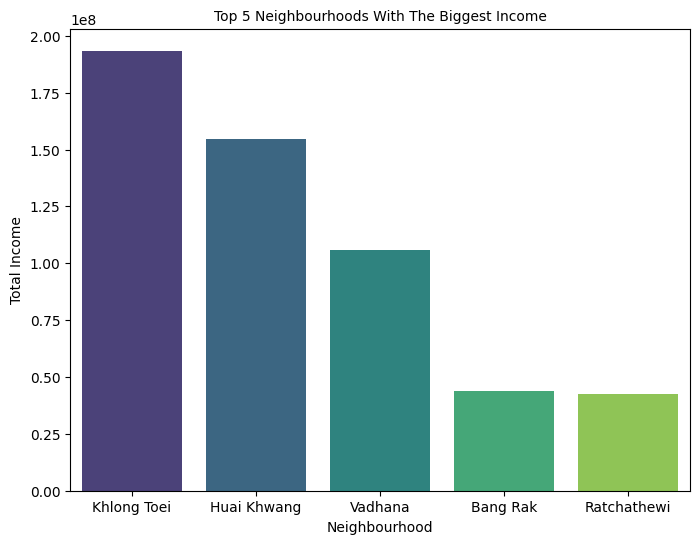

In [314]:
# Barcart Top 5 Neighbourhoods dengan Total Income Tertinggi
plt.figure(figsize=(8, 6))
sb.barplot(x=top_5_locations_biggest_income.index, y=top_5_locations_biggest_income.values, palette='viridis')
plt.title("Top 5 Neighbourhoods With The Biggest Income", fontsize=10)
plt.xlabel("Neighbourhood", fontsize=10)
plt.ylabel("Total Income", fontsize=10)
plt.show()

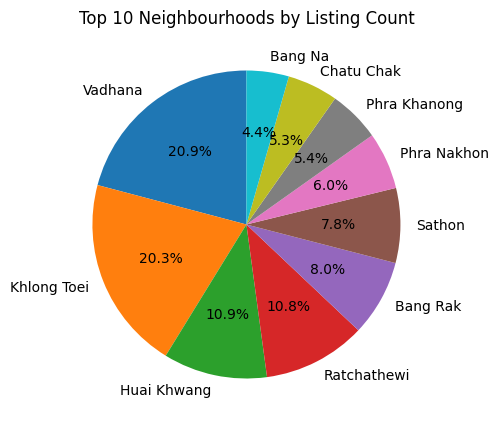

In [315]:
# The Neighbourhood with the most listing
plt.figure(figsize=(5, 5))
plt.pie(top_10_neighbourhoods, labels=top_10_neighbourhoods.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.show()

In [191]:
# cek distribusi kolom calculated_host_listings_count
from scipy.stats import normaltest
stats, pval=normaltest(df['calculated_host_listings_count'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [192]:
# cek distribusi kolom number_of_reviews
from scipy.stats import normaltest
stats, pval=normaltest(df['number_of_reviews'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [193]:
# cek distribusi kolom price
from scipy.stats import normaltest
stats, pval=normaltest(df['price'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [194]:
# cek distribusi minimun night
from scipy.stats import normaltest
stats, pval=normaltest(df['minimum_nights'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [195]:
# cek distribusi availability_365
from scipy.stats import normaltest
stats, pval=normaltest(df['availability_365'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Pada Column `number_of_reviews`, `price`, `minimun_nights`, dan `calculated_host_listings_count` sudah dicek distribusi. Dan semuanya tidak terdistribusi normal. Hal ini berarti menggunakan uji korelasi menggunakan spearman

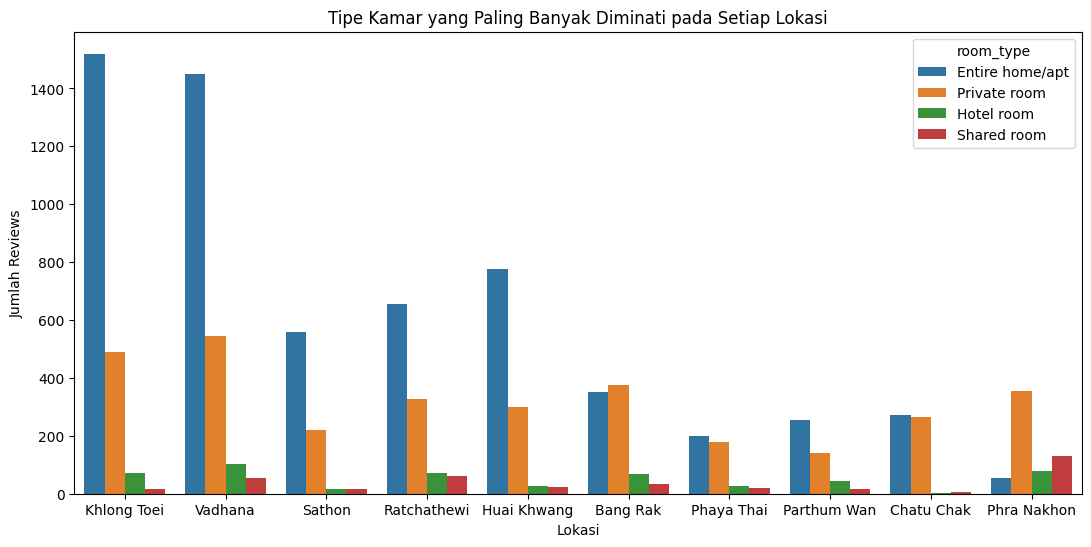

In [284]:
# Mengurutkan DataFrame berdasarkan total reviews secara descending
sorted_df = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index().sort_values(by='number_of_reviews', ascending=False)

# Mengambil 10 lokasi dengan jumlah reviews tertinggi
top_10_locations = sorted_df.head(10)['neighbourhood']

# Filter data hanya untuk 10 lokasi teratas
filtered_df = df[df['neighbourhood'].isin(top_10_locations)]

# Membuat count plot
plt.figure(figsize=(13, 6))
sb.countplot(x='neighbourhood', hue='room_type', data=filtered_df, order=top_10_locations)

# Menambahkan label dan judul
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Reviews')
plt.title('Tipe Kamar yang Paling Banyak Diminati pada Setiap Lokasi')

# Menampilkan plot
plt.show()

In [295]:
# Menghitung jumlah listing untuk setiap neighbourhood
count_per_neighbourhood = df['neighbourhood'].value_counts()
top_10_neighbourhoods = count_per_neighbourhood.head(10)
top_10_neighbourhoods

neighbourhood
Vadhana         2152
Khlong Toei     2097
Huai Khwang     1125
Ratchathewi     1114
Bang Rak         827
Sathon           809
Phra Nakhon      619
Phra Khanong     558
Chatu Chak       548
Bang Na          458
Name: count, dtype: int64

Text(0, 0.5, 'Jumlah')

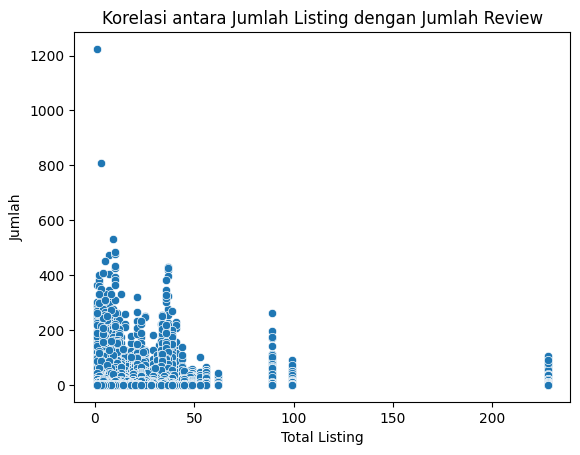

In [197]:
sb.scatterplot(data= df, x= 'calculated_host_listings_count', y= 'number_of_reviews')
plt.title("Korelasi antara Jumlah Listing dengan Jumlah Review")
plt.xlabel("Total Listing")
plt.ylabel("Jumlah")

In [198]:
df[['calculated_host_listings_count', 'number_of_reviews']].corr(method='spearman')

,calculated_host_listings_count,number_of_reviews
calculated_host_listings_count,1.00000,0.22107
number_of_reviews,0.22107,1.00000


## Berdasarkan Type Kamar
- Type Kamar apa yang paling banyak diminati?
- Bagaimana sebaran jenis listing pada tiap lokasi ? 
- apakah ada hubungan antara type kamar dengan total income?

In [199]:
type_of_room = df['room_type'].unique()
type_of_room

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x29e372c2480>,
 [Text(0.21346347322800655, -1.0790891277357197, 'Entire home/apt'),
  Text(0.040427428422584614, 1.0992568503453308, 'Private room'),
  Text(-1.038597835770383, 0.36237347520628094, 'Hotel room'),
  Text(-1.0940972647188183, 0.11380323077487861, 'Shared room')],
 [Text(0.11643462176073083, -0.5885940696740288, '56.2%'),
  Text(0.02205132459413706, 0.5995946456429077, '36.4%'),
  Text(-0.5665079104202088, 0.19765825920342595, '4.1%'),
  Text(-0.5967803262102644, 0.06207448951357014, '3.3%')])

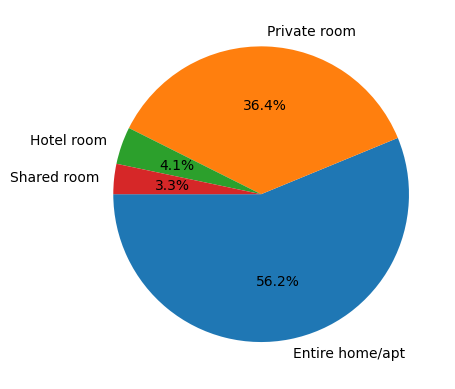

In [200]:
# menampilkan tipe kamar yang paling banyak diminati dalam bentuk pie chart
type_of_room_count = df['room_type'].value_counts()
plt.pie(type_of_room_count, labels=type_of_room_count.index, autopct='%1.1f%%', startangle=180)

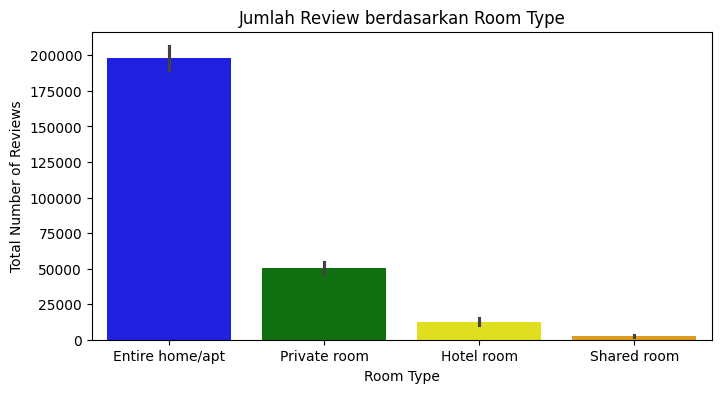

In [201]:
# Tentukan palet warna berbeda untuk setiap 'room_type'
palette_colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Hotel room' : 'yellow', 'Shared room': 'orange'}

# Plot menggunakan Seaborn
plt.figure(figsize=(8, 4))
sb.barplot(data=df, x='room_type', y='number_of_reviews', estimator=sum, palette=palette_colors)
plt.title("Jumlah Review berdasarkan Room Type", fontsize=12)
plt.xlabel("Room Type", fontsize=10)
plt.ylabel("Total Number of Reviews", fontsize=10)
plt.show()


Dari data di atas dapat disimpulkan bahwa jenis listing yang paling banyak diminati atau paling banyak di-reviews adalah tipe `Entier home/apt`

# Berdasarkan Harga 
1. Bagaimana rata2 harga sewa listing di top 10 lokasi
2. Bagaimana rata-rata harga sewa listing pada jenis listing yang paling banyak diminati?
3. Bagaimana harga listing yang ditawarkan top 10 host
4. Apakah harga memiliki hubungan dengan total reviews?


Rata-rata harga listip pada Top 10 Lokasi

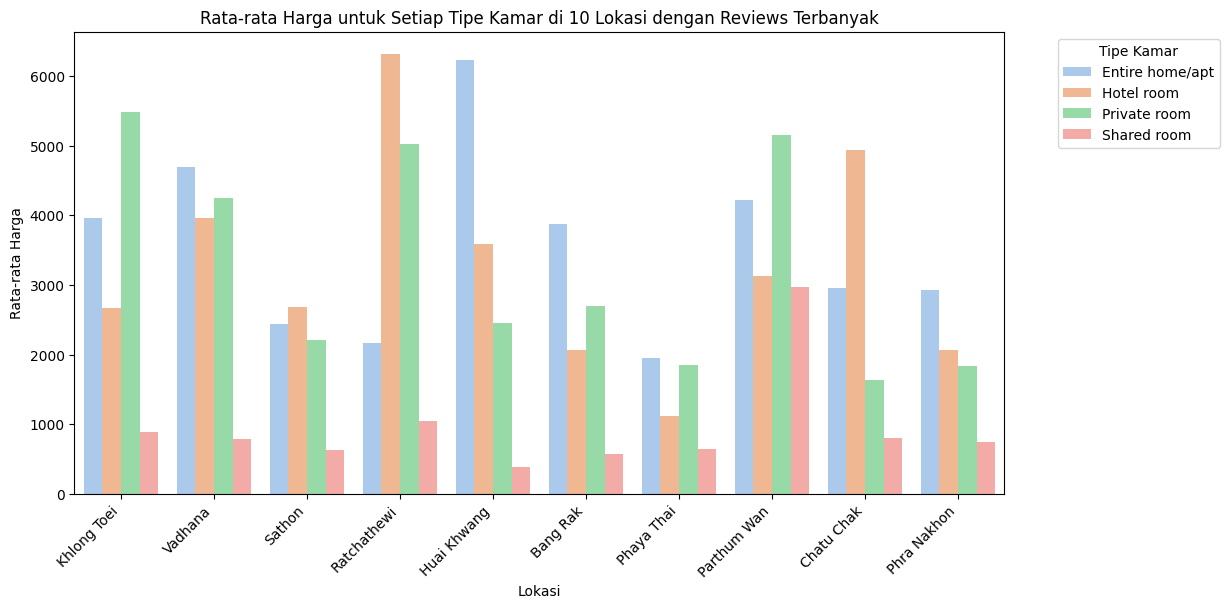

In [327]:
filtered_df = df[df['neighbourhood'].isin(top_10_locations)]

# Hitung rata-rata harga untuk setiap tipe kamar
average_price_by_room = filtered_df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# Urutkan DataFrame berdasarkan total reviews secara descending
order = df.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10).index

# Visualisasikan hasilnya dan batasi hanya 10 lokasi teratas
plt.figure(figsize=(12, 6))
sb.barplot(x='neighbourhood', y='price', hue='room_type', data=average_price_by_room, palette='pastel', order=order, ci=None)
plt.title('Rata-rata Harga untuk Setiap Tipe Kamar di 10 Lokasi dengan Reviews Terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Tipe Kamar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

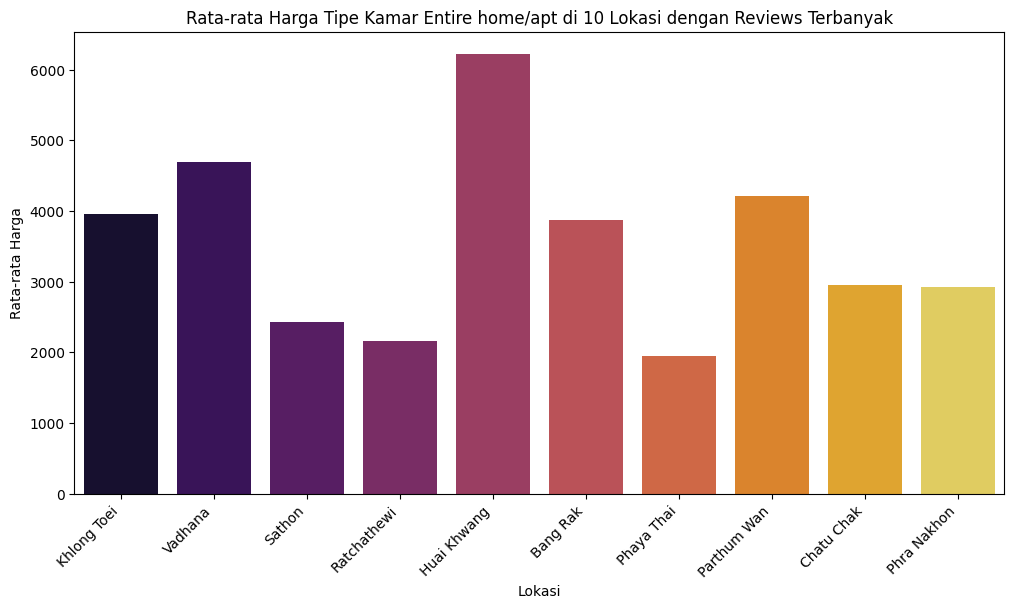

In [326]:
filtered_df = df[df['neighbourhood'].isin(top_10_locations)]

# Hitung rata-rata harga untuk tipe kamar 'Entire home/apt'
average_price_entire_home = filtered_df[filtered_df['room_type'] == 'Entire home/apt'].groupby('neighbourhood')['price'].mean().reset_index()

# mengurutkan DataFrame berdasarkan total reviews secara descending
order = df.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10).index


plt.figure(figsize=(12, 6))
sb.barplot(x='neighbourhood', y='price', data=average_price_entire_home, palette='inferno', order=order, ci=None)
plt.title('Rata-rata Harga Tipe Kamar Entire home/apt di 10 Lokasi dengan Reviews Terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=45, ha='right')  
plt.show()


In [320]:
average_price_by_room = df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()
# Pilih 10 lokasi dengan total reviews tertinggi
top_10_locations = df.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10).index

# Filter data hanya untuk 10 lokasi teratas
filtered_df = average_price_by_room[average_price_by_room['neighbourhood'].isin(top_10_locations)]

# Tampilkan tabel rata-rata harga
table = pd.pivot_table(filtered_df, values='price', index='neighbourhood', columns='room_type', aggfunc='mean')
table

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Rak,3869.917379,2065.358209,2697.565333,567.147059
Chatu Chak,2950.439560,4944.500000,1640.518797,798.142857
Huai Khwang,6222.608247,3591.680000,2452.262458,388.173913
Khlong Toei,3962.268421,2665.109589,5481.063395,893.600000
Parthum Wan,4213.941176,3132.622222,5154.557143,2976.666667
Phaya Thai,1944.808081,1119.461538,1847.284916,641.421053
Phra Nakhon,2926.964286,2065.610390,1834.422535,744.511450
Ratchathewi,2159.844512,6317.500000,5018.966361,1044.327869
Sathon,2433.080790,2682.066667,2207.018182,625.529412


In [237]:
# total rata-rata harga untuk setiap tipe kamar pada 10 top location
total_average_price = average_price_by_room.groupby('room_type')['price'].sum().reset_index()
total_average_price['price'] /= 10
total_average_price

,room_type,price
0,Entire home/apt,3538.294413
1,Hotel room,3254.969708
2,Private room,3258.476758
3,Shared room,947.274669


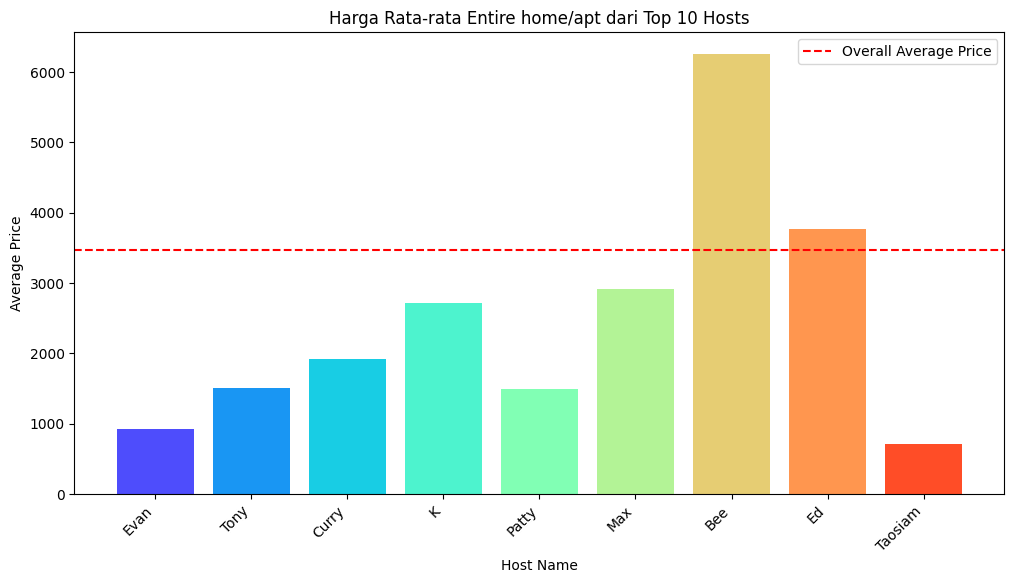

In [328]:
# Pilih 10 host dengan jumlah review tertinggi
top_10_hosts = df.groupby('host_name')['number_of_reviews'].sum().nlargest(10).index

# Filter data hanya untuk 10 host teratas dan tipe kamar 'Entire home/apt'
filtered_df = df[(df['host_name'].isin(top_10_hosts)) & (df['room_type'] == 'Entire home/apt')]

# Hitung rata-rata harga 'Entire home/apt' untuk setiap host
average_price_entire_home = filtered_df.groupby('host_name')['price'].mean().reset_index()

# Hitung rata-rata harga 'Entire home/apt' secara keseluruhan
overall_average_price_entire_home = df[df['room_type'] == 'Entire home/apt']['price'].mean()

# Urutkan berdasarkan jumlah review tertinggi
sorted_hosts = df.groupby('host_name')['number_of_reviews'].sum().nlargest(10).index

# Pilih palet warna Seaborn
color_palette = sb.color_palette('rainbow', n_colors=len(average_price_entire_home))

# Buat bar chart dengan garis tengah untuk rata-rata harga secara keseluruhan
plt.figure(figsize=(12, 6))
sorted_average_price_entire_home = average_price_entire_home.sort_values(by='host_name', key=lambda x: pd.Categorical(x, categories=sorted_hosts, ordered=True))
plt.bar(sorted_average_price_entire_home['host_name'], sorted_average_price_entire_home['price'], color=color_palette)

# Tambahkan garis tengah untuk rata-rata harga secara keseluruhan
plt.axhline(y=overall_average_price_entire_home, color='red', linestyle='--', label='Overall Average Price')

# Menambahkan label dan judul
plt.xlabel('Host Name')
plt.ylabel('Average Price')
plt.title('Harga Rata-rata Entire home/apt dari Top 10 Hosts')
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.show()

# Berdasarkan Host
- Siapa Top 10 host yang memiliki popularitas paling tinggi ?
Berapakah rata-rata harga sewa listing yang dimiliki top 10 host tersebut? 
- Apakah terdapat hubungan antara jumlah listing yang dimiliki top 5 terhadap jumlah reviews
- Apakah terdapat pengerauh antara harga sewa dengan kepopularitasan hosting ?


In [203]:
# 10 host paling banyak direview
total_reviews_host = df.groupby('host_name')['number_of_reviews'].sum()
sorted_reviews_host = total_reviews_host.sort_values(ascending=False)
top_10_host = sorted_reviews_host.head(10)
top_10_host


host_name
Evan          6117
Tony          5010
Curry         4708
Themustang    3584
K             2962
Patty         2929
Max           2915
Bee           2823
Ed            2817
Taosiam       2681
Name: number_of_reviews, dtype: int64

In [204]:
host_totals = df.groupby('host_name').agg({'number_of_reviews': 'sum', 'calculated_host_listings_count': 'first'}).reset_index()

# Mengurutkan berdasarkan total reviews secara descending
host_totals_sorted = host_totals.sort_values(by='number_of_reviews', ascending=False)

# Menampilkan 10 data teratas
top_10_hosts = host_totals_sorted.head(10)
top_10_hosts

,host_name,number_of_reviews,calculated_host_listings_count
991,Evan,6117,37
4497,Tony,5010,34
808,Curry,4708,228
4396,Themustang,3584,10
1537,K,2962,89
2948,Patty,2929,1
2127,Max,2915,2
398,Bee,2823,7
934,Ed,2817,33
4218,Taosiam,2681,34


<function matplotlib.pyplot.show(close=None, block=None)>

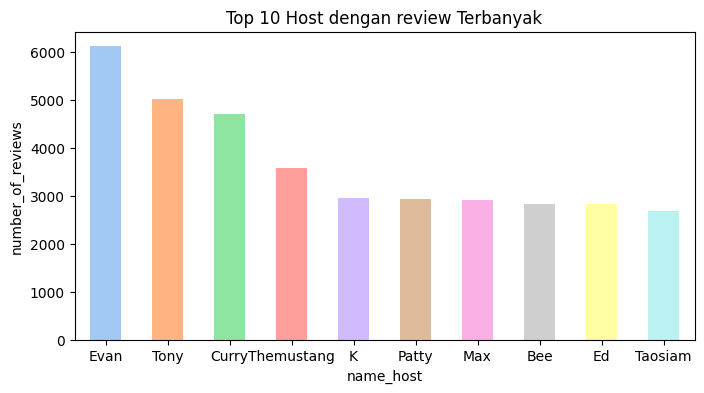

In [205]:
# Bar Chart Top 10 host dengan reviews paling banyak
colors = sb.color_palette('pastel', len(top_10_host))
plt.figure(figsize=(8, 4))
top_10_host.plot(kind='bar', color=colors)
plt.title('Top 10 Host dengan review Terbanyak')
plt.xlabel('name_host')
plt.ylabel('number_of_reviews')
plt.xticks(rotation='horizontal')
plt.show

Rata2 harga per-type room yang ditawarkan top 10 host, dalam hal ini kita juga dapat melihat apakah, kepopularitasan host mempengaruhi harga listing

In [248]:
top_10_hosts = df.groupby('host_name')['number_of_reviews'].sum().nlargest(10).index

# Filter data hanya untuk 10 host teratas dan tipe kamar 'Entire home/apt'
filtered_df = df[(df['host_name'].isin(top_10_hosts)) & (df['room_type'] == 'Entire home/apt')]

# Hitung rata-rata harga 'Entire home/apt' untuk setiap host
average_price_entire_home = filtered_df.groupby('host_name')['price'].mean().reset_index()

# Tampilkan tabel rata-rata harga
print(average_price_entire_home)

  host_name        price
0       Bee  6255.833333
1     Curry  1922.456140
2        Ed  3762.785714
3      Evan   928.432432
4         K  2715.189189
5       Max  2913.130435
6     Patty  1487.775000
7   Taosiam   709.833333
8      Tony  1506.740000


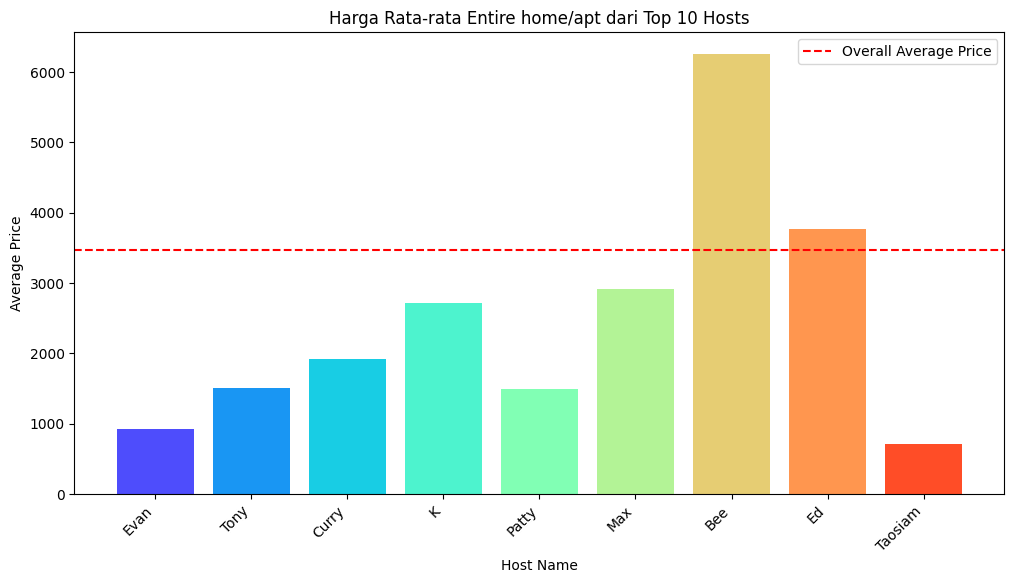

In [335]:
# Hitung rata-rata harga 'Entire home/apt' secara keseluruhan
overall_average_price_entire_home = df[df['room_type'] == 'Entire home/apt']['price'].mean()
sorted_hosts = df.groupby('host_name')['number_of_reviews'].sum().nlargest(10).index

# Pilih palet warna Seaborn
color_palette = sb.color_palette('rainbow', n_colors=len(average_price_entire_home))

# Buat bar chart dengan garis tengah untuk rata-rata harga secara keseluruhan
plt.figure(figsize=(12, 6))
sorted_average_price_entire_home = average_price_entire_home.sort_values(by='host_name', key=lambda x: pd.Categorical(x, categories=sorted_hosts, ordered=True))
plt.bar(sorted_average_price_entire_home['host_name'], sorted_average_price_entire_home['price'], color=color_palette)

# Tambahkan garis tengah untuk rata-rata harga secara keseluruhan
plt.axhline(y=overall_average_price_entire_home, color='red', linestyle='--', label='Overall Average Price')

# Menambahkan label dan judul
plt.xlabel('Host Name')
plt.ylabel('Average Price')
plt.title('Harga Rata-rata Entire home/apt dari Top 10 Hosts')
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.show()

In [206]:
corr, p_value = spearmanr(df['calculated_host_listings_count'], df['number_of_reviews'])
print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.22106954708691967
P-value: 9.78815852015145e-175


Text(0, 0.5, 'Jumlah')

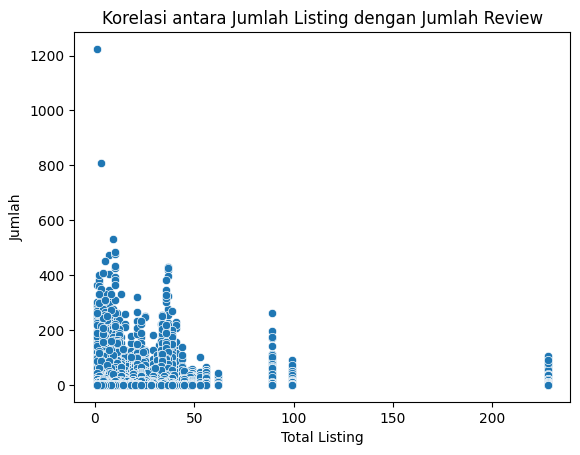

In [207]:
#Scaterplot korelasi total listing dengann number of reviews
sb.scatterplot(data= df, x= 'calculated_host_listings_count', y= 'number_of_reviews')
plt.title("Korelasi antara Jumlah Listing dengan Jumlah Review")
plt.xlabel("Total Listing")
plt.ylabel("Jumlah")

In [208]:
# cek korelasi antara harga dengan total reviews
corr, p_value = spearmanr(df['price'], df['number_of_reviews'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: -0.020783772258981592
P-value: 0.008872349889522345


Text(0, 0.5, 'Jumlah')

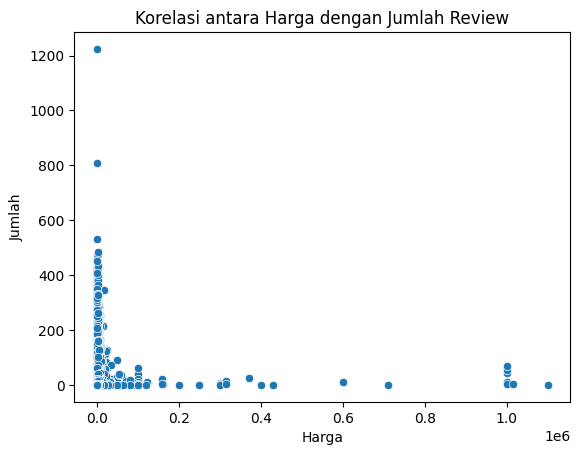

In [209]:
#Scaterplot korelasi total listing dengann number of reviews
sb.scatterplot(data= df, x= 'price', y= 'number_of_reviews')
plt.title("Korelasi antara Harga dengan Jumlah Review")
plt.xlabel("Harga")
plt.ylabel("Jumlah")

# Berdasarkan Minimum Lama Sewa 
- Tipe Jenis Kamar dengan minimum night 
-Mengetahui karater pelanggan, dengan cara melihat ada berapa banyak reviews berdasarkan peraturan minimum night yang ditetapkan oleh host. Apakah lebih banyak pelanggan yang ingin menyewa dalam jangka pendek atau jangka panjang

<Figure size 1000x600 with 0 Axes>

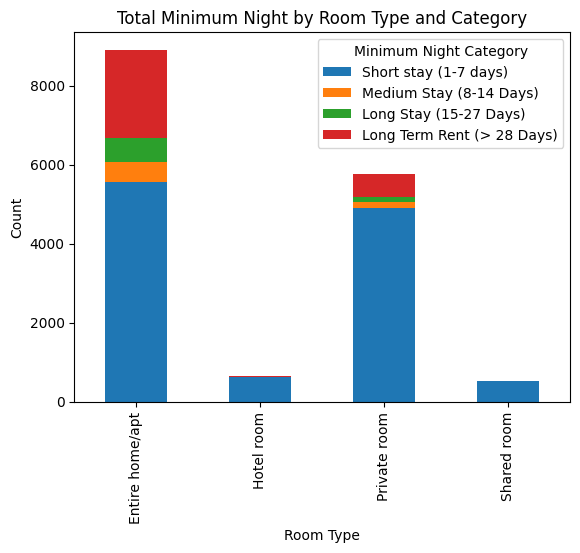

In [310]:
bins = [0, 7, 14, 27, float('inf')]
labels = ['Short stay (1-7 days)', 'Medium Stay (8-14 Days)', 'Long Stay (15-27 Days)', 'Long Term Rent (> 28 Days)']
df['Minimum Night Category'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels, right=False)

# Menampilkan bar grafik
plt.figure(figsize=(10, 6))
df.groupby(['room_type', 'Minimum Night Category']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total Minimum Night by Room Type and Category')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Minimum Night Category')
plt.show()